# Computational Physics U24568 2024-2025

# Lecture 4b - Model Fitting

# Introduction

In today's lecture we will explore several different methods to fit a model to astronomical data. In the first half of the lecture we will determine the Hubble Constant through 3 different model fitting methods. In the second half of the lecture you will take data from a periodic source to determine a model which best fits the data.

In this lecture we will:

*   Create a model and fit it to Hubble data
*   Determine the model via the scipy optimize function curve_fit
*   Determine the model via the numpy function polyfit
*   Understand how well these models fit the data via residuals and the coefficient of determination


In [ ]:
# Packages to import
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Determining the Hubble Constant

The Hubble constant can be calculated via the following formula:

$H_{0} = \frac{z c}{d}$

where z = redshift, c = speed of light ($3\times10^5$ kms$^{-1}$) and d = distance (Mpc). Remember $H_{0}$ typically has units of kms$^{-1}$Mpc$^{-1}$.

Below you have been given data from an astronomical survey which has found the luminosity distance and redshift to 16 galaxies. It is now our job to determine the Hubble Constant and understand the confidence we have in our results.

In [ ]:
# Distance and Redshift to 16 galaxies
distance = np.array([77, 4, 10, 21, 45, 15, 17, 22, 70, 57, 62, 12, 6, 33, 29, 2], dtype = 'float') # in Mpc
z = np.array([174.53, 9.07, 22.67, 47.60, 102.00, 34.00, 38.53, 49.87, 158.67, 129.20, 140.53, 27.20, 13.60, 74.80, 65.73, 4.53], dtype = 'float')*10**-4

**Exercise:** Let's add some noise to each dataset. Create two normal distributions with a mean of zero and standard deviation of 3. Then add this noise to each dataset.

In [ ]:
# Creating noise based on a normal distribution to add to the data - this will be different for everyone!
noise_d = np.random.normal(0,3,len(distance))
noise_z = np.random.normal(0,3,len(z))*10**-4

# Adding the noise to the data
distance += noise_d
z += noise_z

##Look at the data to guess the model



**Exercise**: Plot the luminosity distance versus the redshift data for all of the 16 galaxies to get an idea of what the data look like. Can you think of a model that should fit this data?

a straight line should fit the data


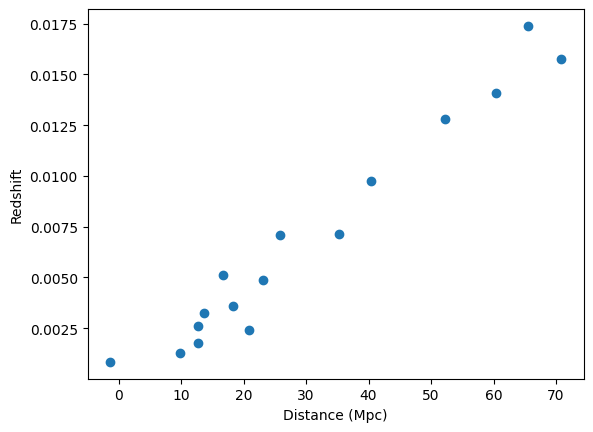

In [ ]:
# Simple plot to see a straight line is needed
plt.plot(distance, z, 'o')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Redshift')

print('a straight line should fit the data')

## Least squares regression

Rather than drawing a best fit curve by eye we can use least squares regression to find a model which best describes the data by minimising the sum of the squares of the residuals on the curve. The residual refers to the difference between the observed value and the model value.

### Linear Fit
Given the problem above we can guess that a simple linear curve of the form $y = mx + c$ (where $m$ = gradient and $c$ = intercept) should describe this data well.


**Exercise**: Determine the gradient

In [ ]:
n = len(z) # or len(distance)
num = (n * sum(distance*z)) - (sum(distance) * sum(z)) # numerator
den = (n * sum(distance**2)) - (sum(distance))**2 # denomenator
m = num / den
m

0.0002442330344864674

**Exercise**: Determine the intercept

In [ ]:
c = (sum(z) - m*(sum(distance))) / n
c

-0.0004162946563122062

**Exercise**: Make a plot showing both the data and the model. Confirm to yourself that the model fits the data well.

Text(0, 0.5, 'Redshift')

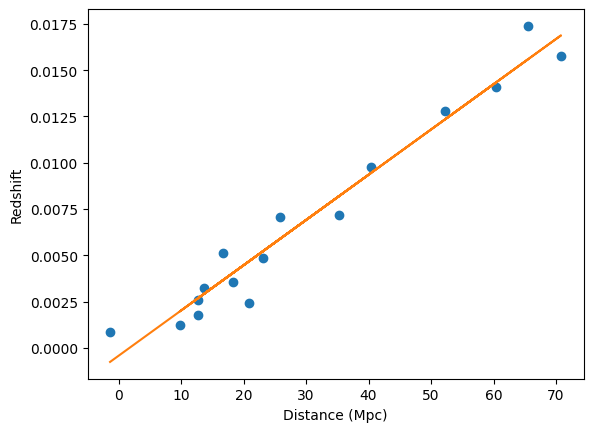

In [ ]:
# Determine the redshift values of the model
zfit = m * distance + c

# Make a plot of the data and the model
plt.plot(distance, z, 'o')
plt.plot(distance, zfit)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Redshift')

**Exercise**: Estimate the Hubble Constant (with units of kms$^{-1}$Mpc$^{-1}$) using your model.

In [ ]:
c_light = 3*10**5 #km/s
hubble = m*c_light # equation for hubble constant

print('Hubble Constant = %s kms^-1Mpc^-1' % hubble)

Hubble Constant = 73.26991034594022 kms-1Mpc^-1


**Exercise:** : Estimate an error on the Hubble constant

In [ ]:
# Calculate the residuals (errors)
inferred_redshifts = m * distance
residuals = z - inferred_redshifts

# Calculate the standard deviation of the residuals
residuals_std = np.std(residuals)

# Calculate the standard error of the slope and y-intercept
n = len(distance)
distance_mean = np.mean(distance)
distance_var = sum((distance - distance_mean)**2)
m_std_error = residuals_std/np.sqrt(distance_var*(n - 1))
c_std_error = residuals_std*np.sqrt(sum(distance**2)/(n*distance_var))
h_std_error = m_std_error*c_light

print('Hubble constant is: %.2f +/- %.2f kms^-1Mpc^-1' % (hubble, h_std_error))


Hubble constant is: 73.27 +/- 1.00 kms^-1Mpc^-1


## Residuals and Coefficient of Determination

We have already met the residual when determining the model via least squares regression. But now we want to understand how well our model fits the data. This is where we turn to the coefficient of determination, also known as R$^2$. It provides a measure of how well a model produces the observed outcomes. A value of R$^2$=1 means that the model represents the data perfectly, whereas a value of R$^2$=0 does not model the data at all. Typically if a model has an R$^2>$0.7  is considered a good fit to the data.

R$^2$ is defined as:

$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$,

where $SS_{res} = \sum(y_i-f_i)^2$ and $SS_{tot} = \sum(y - \bar{y})^2$ for a data set y and model f.



**Exercise:** Calculate the R$^2$ value for your model. Do you think the model fits the data well?

In [ ]:
# The residual
res = z - zfit

# Average redshift
zbar = sum(z) / len(z)

# Calculate R^2
SS_res = sum(res**2)
SS_tot = sum((z-zbar)**2)
R_sqr = 1 - (SS_res / SS_tot)

print('R^2 = {:.15f}'.format(R_sqr))

R^2 = 0.957596756902655



## Scipy Optimize

In the previous section we used least squares regression to determine the model which best represents the Hubble data. Now let's use the ```scipy_optimize``` package to do the same.

We still need to have an idea of the model we want to fit to the data. But the package ```curve_fit``` finds the optimal parameters, in our case the gradient and intercept, for us.

The syntax for curve_fit is typically:

```params, covariance = curve_fit(model, x, y)```

*  params are the optimal values for the parameters so that the sum of the squared residuals of model(x, *params) - y is minimized.
* covariance is the estimated approximate covariance of params.

**Exercise:** Write a function to determine a linear model

In [ ]:
# Define the model
def model(x, m, c):
  y = m * x + c
  return y

**Exercise:** Use the ```curve_fit``` package to determine the gradient and intercept of the data

In [ ]:
# Determine m and c from curve fit
params, _  = curve_fit(model, distance, z)
m_cf, c_cf = params

**Exercise:** Plot your `curve_fit` model with the data

Text(0, 0.5, 'Redshift')

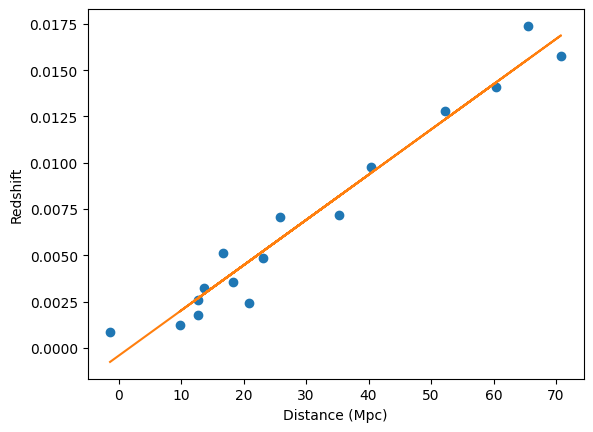

In [ ]:
# Work out the y values of the model
z_model = model(distance, m_cf, c_cf)

# Make plot
plt.plot(distance, z, 'o')
plt.plot(distance, z_model)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Redshift')

**Exercise:** Does this model fit your data better or worse than the model you determined from least squares regression?




In [ ]:
# Work out residuals
res_cf = z - z_model

# Calculate R^2
SS_res = sum(res_cf**2)
R_sqr_cf = 1 - (SS_res / SS_tot) #Can use same SS_tot from previous block of code

print('R^2 = {:.15f}'.format(R_sqr_cf))

R^2 = 0.957596756902655


**Exercise:** Now try fitting a second order polynomial curve (i.e. ax + bx$^2$ + c ) to the data. Does this fit the data better or worse than the linear model you previously used?

R^2 = 0.959761465991006


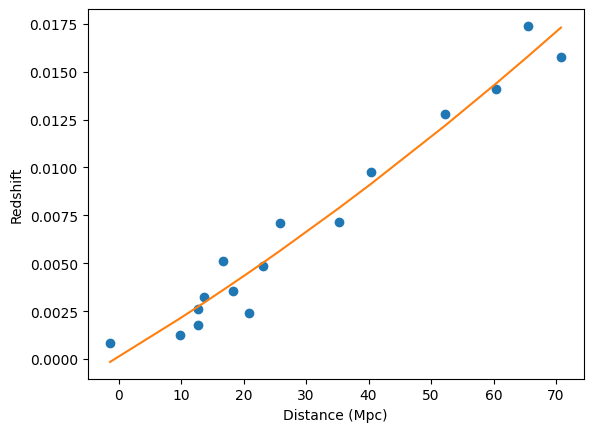

In [ ]:
def model(x, a, b, c):
	return a * x + b * x**2 + c

param, param_cov = curve_fit(model, distance, z)

a_model, b_model, c_model = param

# Work out the y values of the model
z_model = model(distance, a_model, b_model, c_model)

# Make plot
dist1, z_model1 = zip(*sorted(zip(distance, z_model)))

plt.plot(distance, z, 'o')
plt.plot(dist1, z_model1)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Redshift')

# Work out residuals
res_1 = z - z_model

# Calculate R^2
SS_res = sum(res_1**2)
R_sqr_1 = 1 - (SS_res / SS_tot) #Can use same SS_tot from previous block of code

print('R^2 = {:.15f}'.format(R_sqr_1))
print('The second order polynomial model fits the data better than the linear model')



## Numpy Polyfit and Poly1d

So far we have fit a model that we knew or guessed to fit to the Hubble data. But what if you are not sure what type of model may fit the data? This is where the function ```polyfit``` in ```numpy``` comes in. This function is a least squares polynomial fit. So we can use this function to determine which polynomial degree best describes the data.

A polynomial of degree 1 is the linear curve we have been dealing with ($y=mx+c$), degree two is $y=ax^2 +mx +c$, degree three is $y=bx^3 + ax^2 +mx +c$ etc...

The synatx for this function is:

```pol = numpy.polyfit(x, y, degree)```

where pol is polynomial coefficients (highest power first).

We can then use ```numpy.poly1d``` to put our polynomial parameters into its natural form. What this means in practise is we can do the following to work out the y axis values given the model:
```
model = numpy.poly1d(pol)
y_value_model = model(x)
```







**Exercise**: Determine the gradient and intercept of your new model using the `polyfit` function.

In [ ]:
# Degree 1
pol = np.polyfit(distance, z, 1)
m_pol, c_pol = pol

print('m = {:.10f}'.format(m_pol))
print('c = {:.10f}'.format(c_pol))

m = 0.0002442330
c = -0.0004162947


**Exercise:** Make a plot with your new model and the original data

R^2 = 0.9575967569


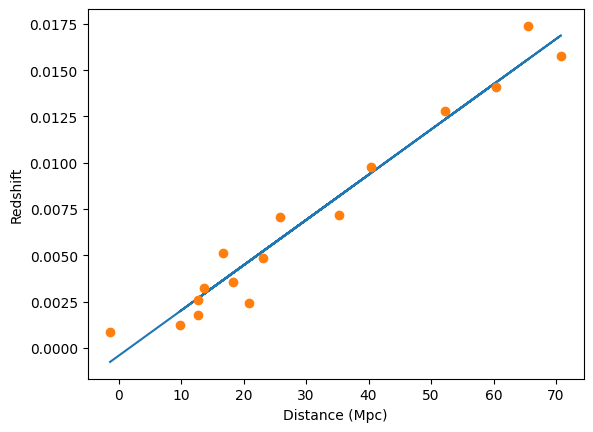

In [ ]:
# Work out z values given model
poly = np.poly1d(pol)
z_pol = poly(distance)

# Make plot
plt.plot(distance, z_pol)
plt.plot(distance, z, 'o')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Redshift')

# Work out residuals
res_pol = z - z_pol

# Calculate R^2
SS_res = sum(res_pol**2)
R_sqr_pol = 1 - (SS_res / SS_tot)

print('R^2 = {:.10f}'.format(R_sqr_pol))

**Exercise:** How does this model compare with the linear model you used from least squares regression and `curve_fit`?

In [ ]:
# Work out residuals
res_pol = z - z_pol

# Calculate R^2
SS_res = sum(res_pol**2)
R_sqr_pol = 1 - (SS_res / SS_tot)
print(R_sqr_pol)

0.9575967569026546


**Exercise:** Does a seocnd order polynomial fit better than a linear fit (according to `polyfit`)?



In [ ]:
# Degree 2
pol2 = np.polyfit(distance, z, 2)

# Work out reshift valyes if model
poly2 = np.poly1d(pol2)
z_pol2 = poly2(distance)

# Residual
res_pol2 = z - z_pol2

# Calculate R^2
SS_res = sum(res_pol2**2)
R_sqr_pol2 = 1 - (SS_res / SS_tot)

print('R^2 = {:.10f}'.format(R_sqr_pol2))
print('A second degree polynomial model fits the data better')

R^2 = 0.9597614660
A second degree polynomial model fits the data better
